# Summarizing full flower data

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from shutil import rmtree
from dateutil import parser
import toyplot

import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib import rcParams

### read in the dataset

In [2]:
inat_flowering = pd.read_csv('../../final_data/fulldata_cleaned_matched_GPT_colors.csv')

/var/folders/qh/c7rwx84921n2kznn09zb2pnh0000gn/T/ipykernel_75876/3403387022.py:1: DtypeWarning: Columns (14,29) have mixed types. Specify dtype option on import or set low_memory=False.
  inat_flowering = pd.read_csv('../../final_data/fulldata_cleaned_matched_GPT_colors.csv')


In [3]:
latmeans = []
latstds = []
latperc10s = []
latperc90s = []
for minlat in range(24, 54):
    maxlat = minlat + 1
    subdf = inat_flowering[(inat_flowering.latitude > minlat) & (inat_flowering.latitude < maxlat)]
    meandoy = np.mean(subdf.day_of_year)
    stddoy = np.std(subdf.day_of_year)
    perc10doy = np.percentile(subdf.day_of_year, 10) # 10 perc
    perc90doy = np.percentile(subdf.day_of_year, 90) # 90 perc
    latmeans.append(meandoy)
    latstds.append(stddoy)
    latperc10s.append(perc10doy)
    latperc90s.append(perc90doy)

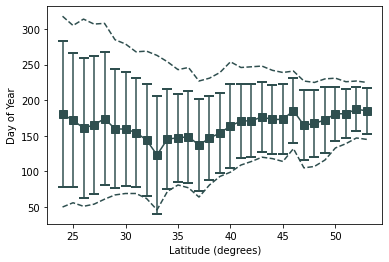

In [4]:
# high res
rcParams['figure.dpi'] = 600

# integer latitude vals for x data
x = range(24,54)

# plot with error bars
plt.errorbar(x, latmeans, yerr=latstds, capsize=5, capthick=2, marker='s', markersize=8,color='#2f4f4f')

# 10 percentile
plt.plot(x, latperc10s, color='#2f4f4f', linestyle='--', label='10th Percentile')

# 90th percentile
plt.plot(x, latperc90s, color='#2f4f4f', linestyle='--', label='90th Percentile')

# labels
plt.xlabel('Latitude (degrees)')
plt.ylabel('Day of Year')

# save
plt.savefig('../overall_phenology.pdf', bbox_inches='tight', dpi=600,format='pdf')

plt.show()

# Make it a violin plot

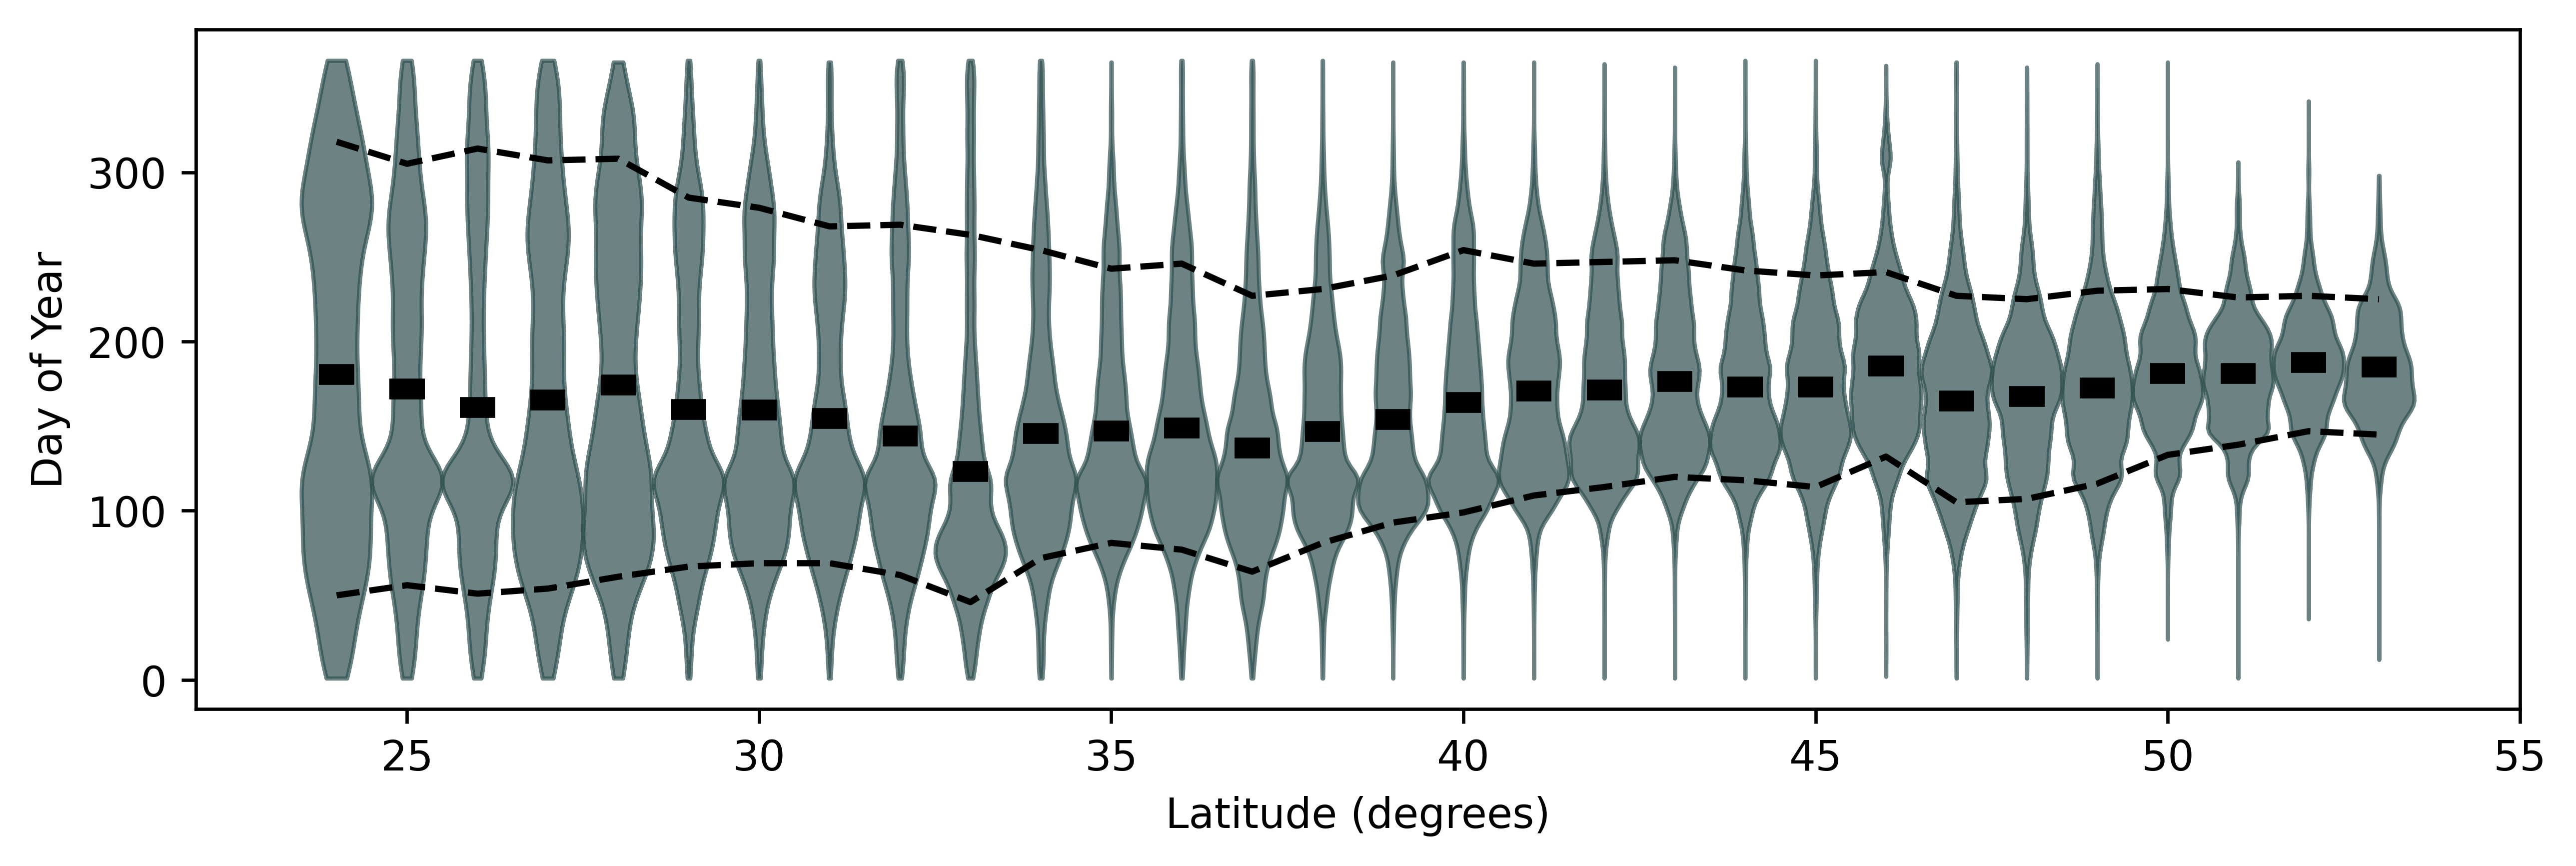

In [5]:
# high res
rcParams['figure.dpi'] = 600

# store stats and data
latmeans = []
latstds = []
latperc10s = []
latperc90s = []
latdata = []  # store day_of_year data for each lat bin

# loop through calculating stats
for minlat in range(24, 54):
    maxlat = minlat + 1
    subdf = inat_flowering[(inat_flowering.latitude > minlat) & (inat_flowering.latitude < maxlat)]
    
    # day_of_year data for violin plot
    day_of_year_data = subdf.day_of_year.values
    latdata.append(day_of_year_data)
    
    # calculate stats
    meandoy = np.mean(day_of_year_data)
    stddoy = np.std(day_of_year_data)
    perc10doy = np.percentile(day_of_year_data, 10)  # 10 perc
    perc90doy = np.percentile(day_of_year_data, 90)  # 90 perc
    
    # append calculated vals to lists
    latmeans.append(meandoy)
    latstds.append(stddoy)
    latperc10s.append(perc10doy)
    latperc90s.append(perc90doy)

### create figure ###
plt.figure(figsize=(10, 3))    
    
# violin plot
violin_parts = plt.violinplot(latdata, 
               positions=range(24, 54), 
               showmeans=True, 
               showmedians=False, 
               widths=1,
               showextrema=False,
              )

violin_color = '#2f4f4f'
# change color of violins
for pc in violin_parts['bodies']:
    pc.set_facecolor(violin_color)
    pc.set_edgecolor(violin_color)
    pc.set_alpha(0.7)

# other small things
violin_parts['cmeans'].set_color('black')  # means
violin_parts['cmeans'].set_linewidth(5)

# 10th perc
plt.plot(range(24, 54), latperc10s, color='black', linestyle='--', label='10th Percentile')

# 90th perc
plt.plot(range(24, 54), latperc90s, color='black', linestyle='--', label='90th Percentile')

# labels
plt.xlabel('Latitude (degrees)')
plt.ylabel('Day of Year')

# save
plt.savefig('../overall_phenology_violin1.pdf', bbox_inches='tight', dpi=600, format='pdf')

plt.show()

# Flip axes

In [6]:
doymeans = []
doystds = []
doyperc10s = []
doyperc90s = []
for mindoy in range(0, 366-7,7):
    maxdoy = mindoy + 7
    subdf = inat_flowering[(inat_flowering.day_of_year >= mindoy) & (inat_flowering.day_of_year < maxdoy)]
    meanlat = np.mean(subdf.latitude)
    stdlat = np.std(subdf.latitude)
    perc10lat = np.percentile(subdf.latitude, 10) # 10th perc
    perc90lat = np.percentile(subdf.latitude, 90) # 90th perc
    doymeans.append(meanlat)
    doystds.append(stdlat)
    doyperc10s.append(perc10lat)
    doyperc90s.append(perc90lat)

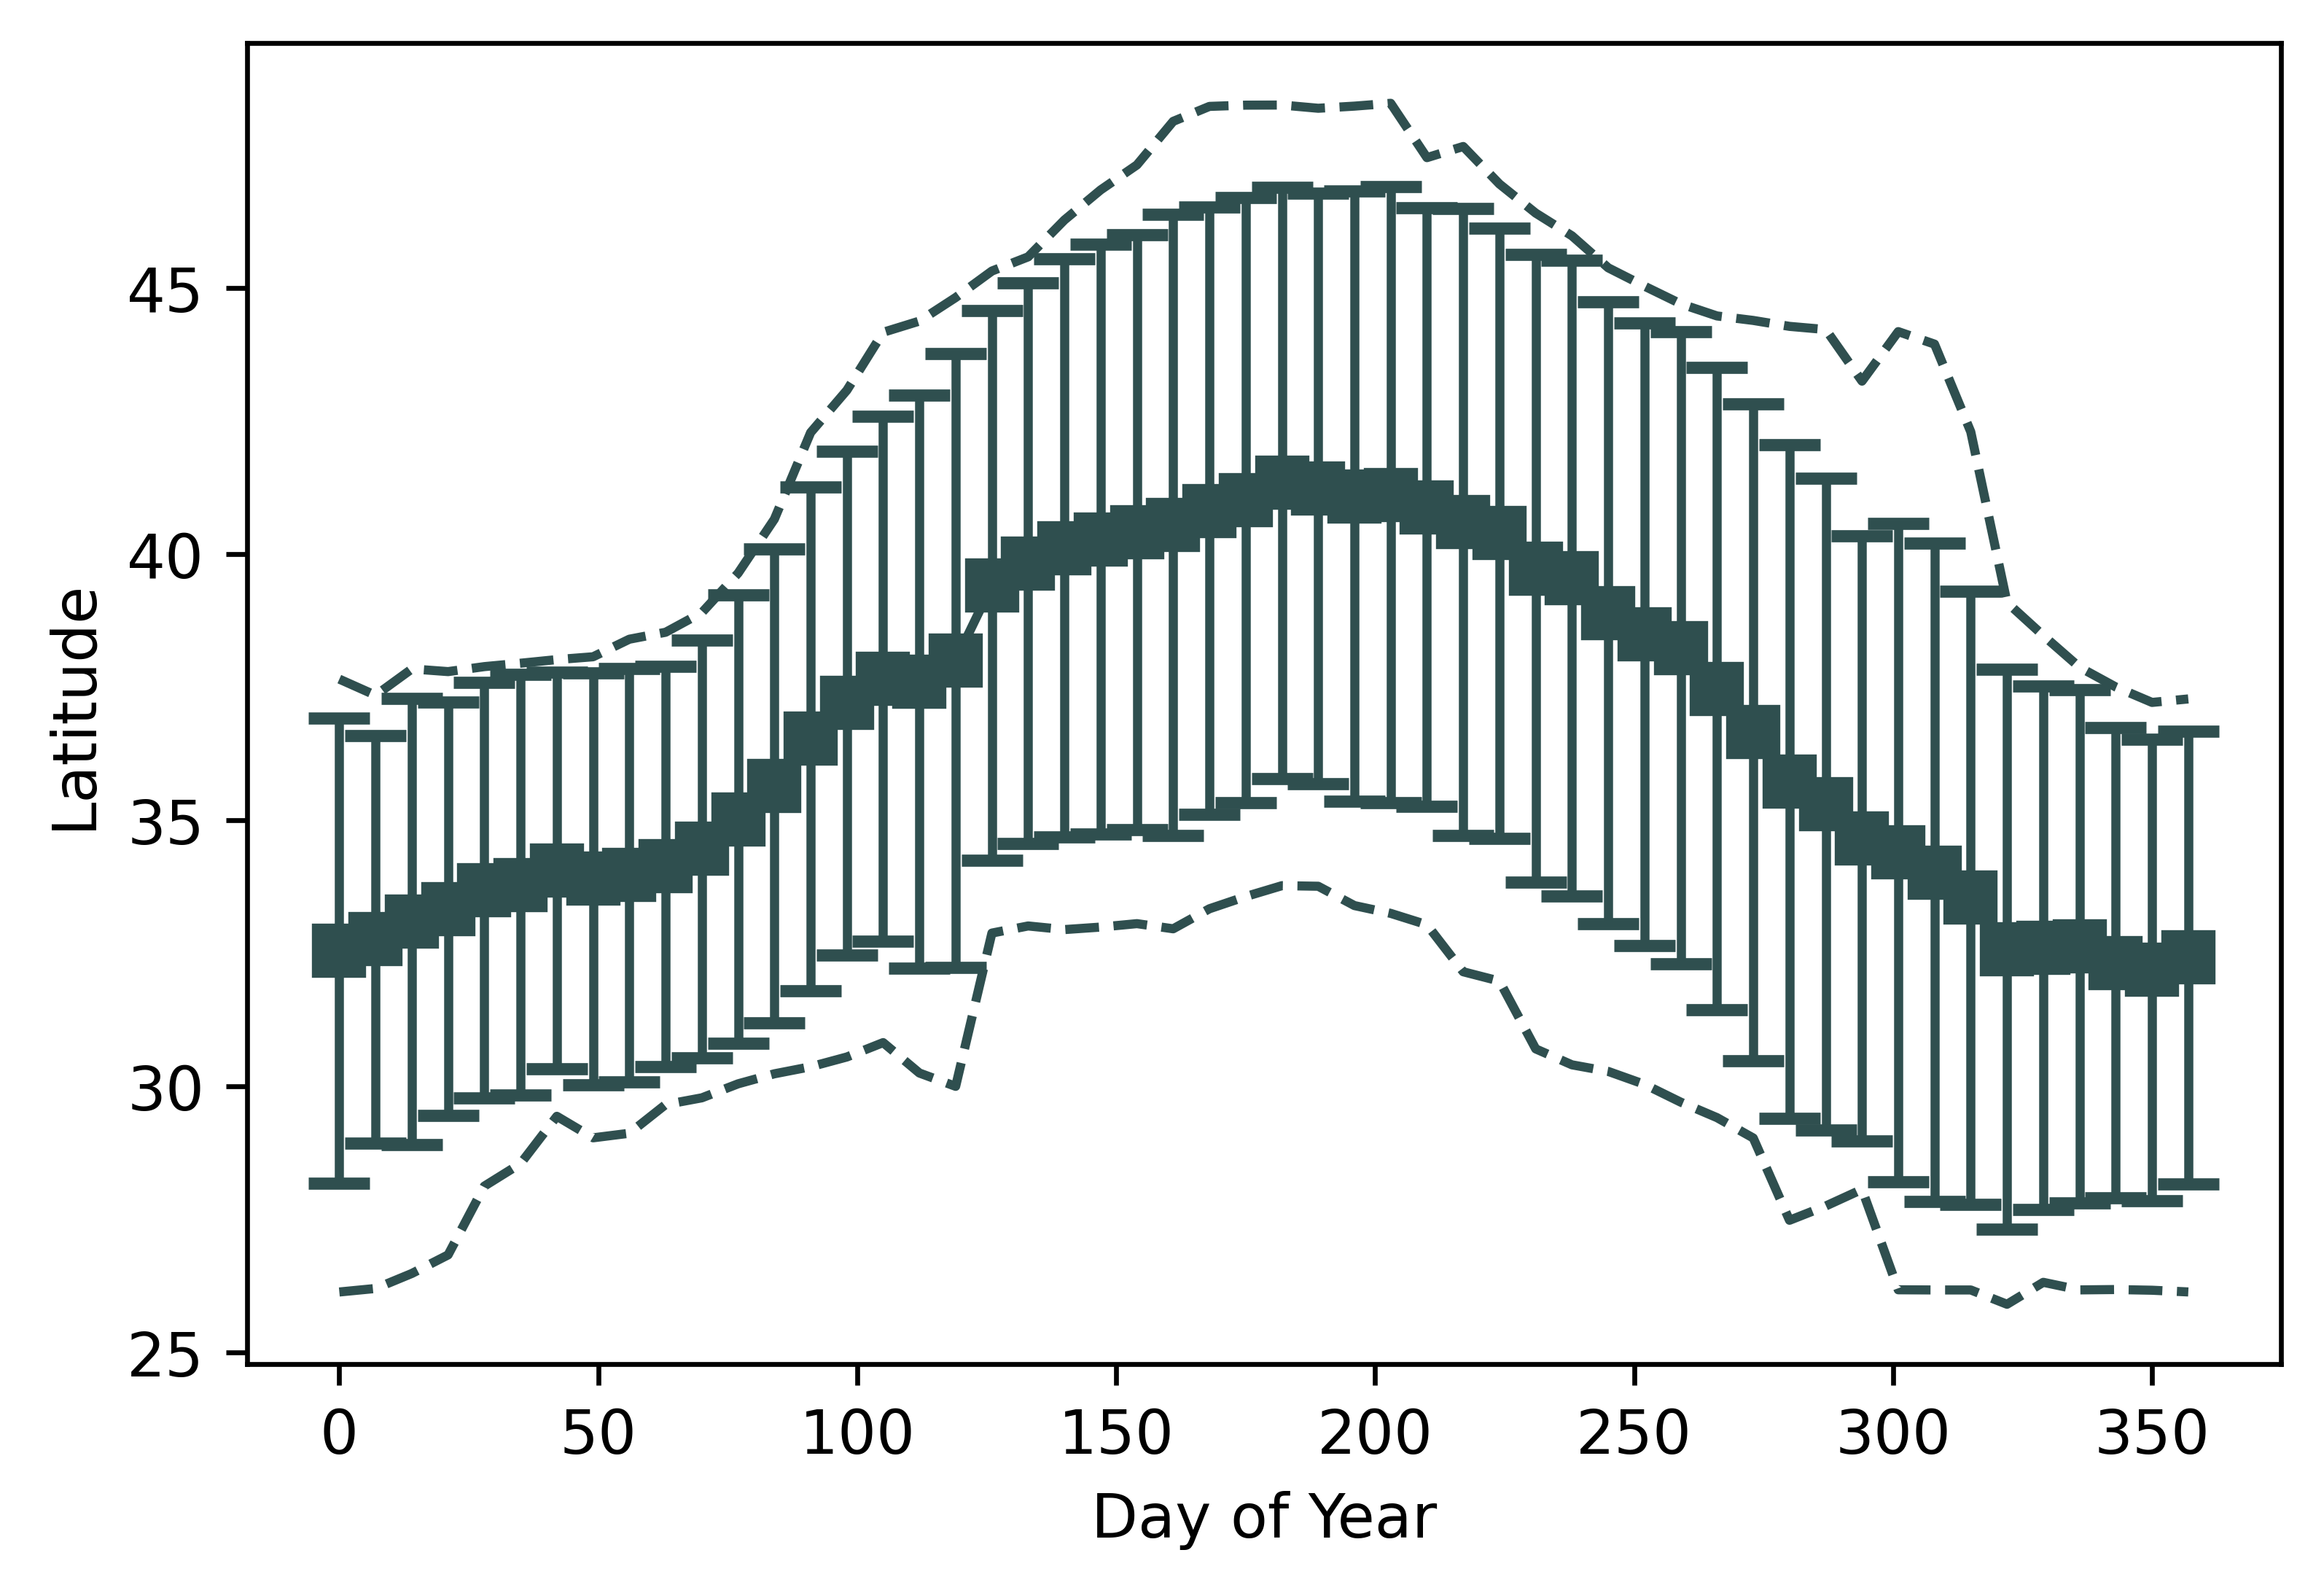

In [7]:
# high res
rcParams['figure.dpi'] = 600

# full year
x = range(0,366-7,7)

# plot w error bars
plt.errorbar(x, doymeans, yerr=doystds, capsize=5, capthick=2, marker='s', markersize=8,color='#2f4f4f')

# 10 perc
plt.plot(x, doyperc10s, color='#2f4f4f', linestyle='--', label='10th Percentile')

# 90 perc
plt.plot(x, doyperc90s, color='#2f4f4f', linestyle='--', label='90th Percentile')

# labels
plt.xlabel('Day of Year')
plt.ylabel('Latitude')

# save
#plt.savefig('../overall_phenology.pdf', bbox_inches='tight', dpi=600,format='pdf')

plt.show()

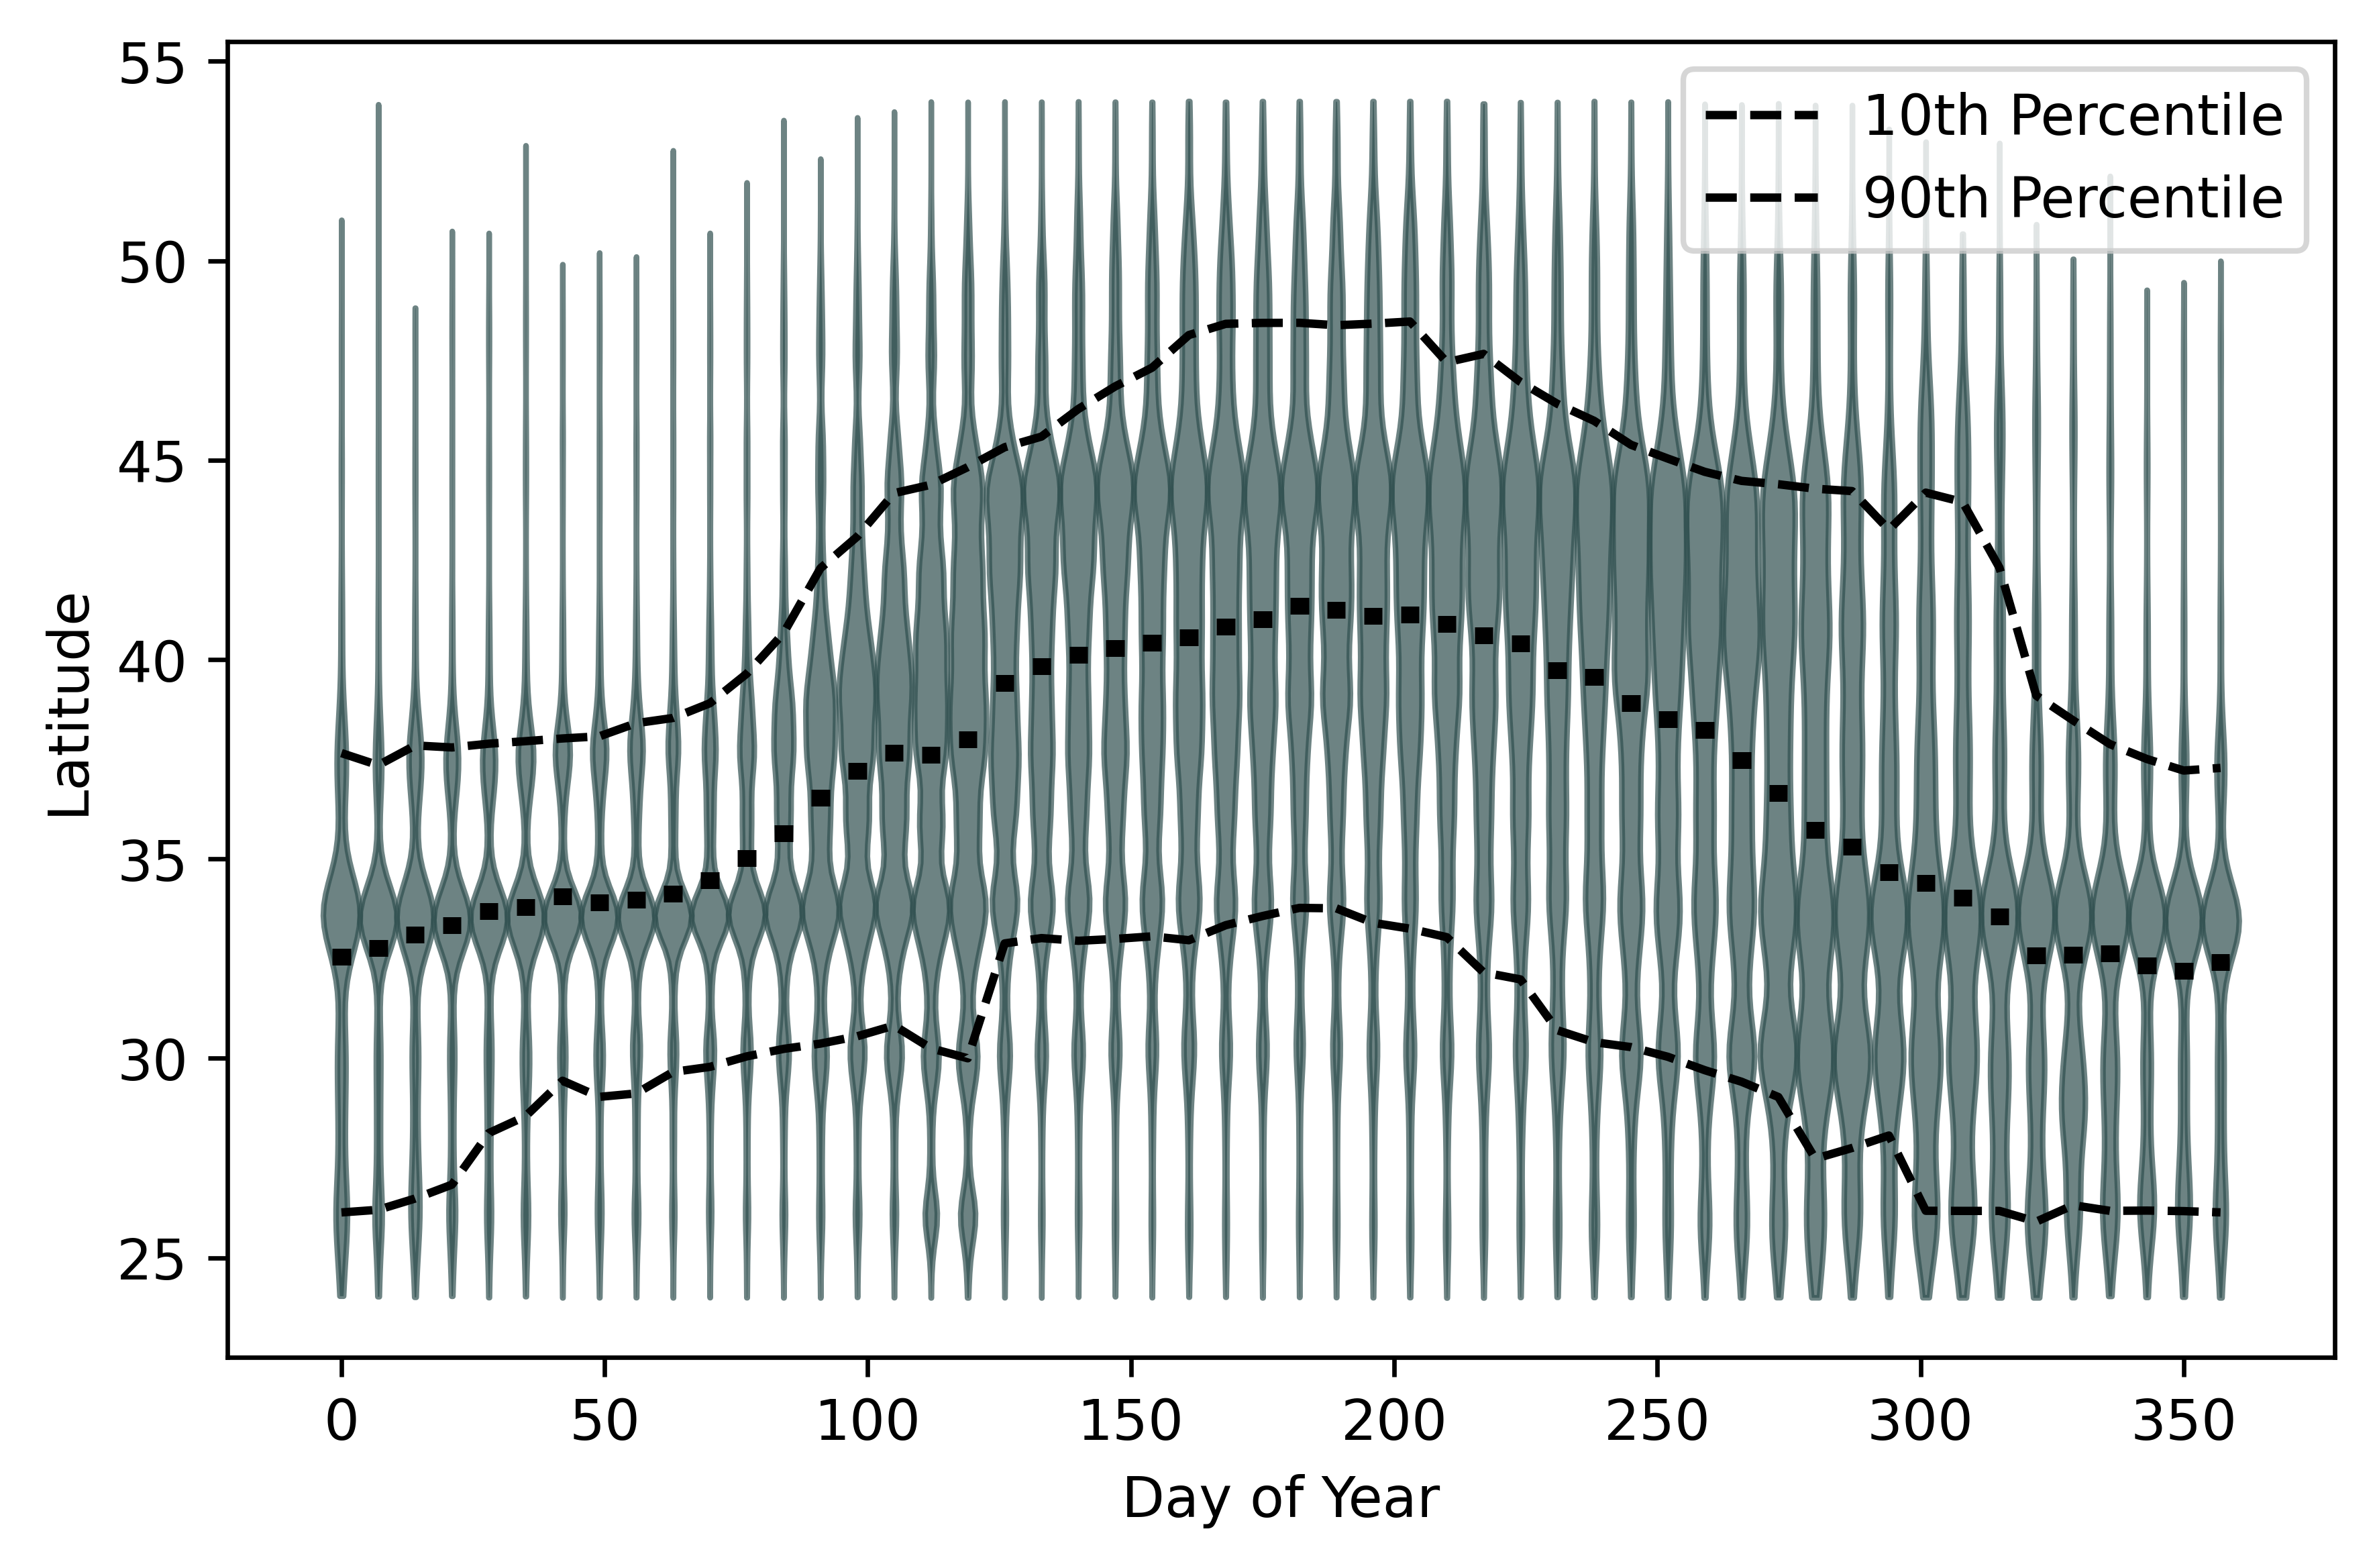

In [8]:
# high res
plt.rcParams['figure.dpi'] = 600

doydata = []  # store latitude data for each day_of_year range

# day_of_year loop, extracting data for violin
for mindoy in range(0, 366-7, 7):
    maxdoy = mindoy + 7
    subdf = inat_flowering[(inat_flowering.day_of_year >= mindoy) & (inat_flowering.day_of_year < maxdoy)]
    
    # latitude values for violin plot
    latitude_data = subdf.latitude.values
    doydata.append(latitude_data)

# violin plot
violin_parts = plt.violinplot(doydata, 
               positions=range(0, 366-7, 7), # x axis = day of year
               showmeans=True, 
               showmedians=False, 
               widths=7,
               showextrema=False)

# change color of elements
violin_parts['cmeans'].set_color('black')
violin_parts['cmeans'].set_linewidth(3)

# change maain plot parts color
violin_color = '#2f4f4f'
for pc in violin_parts['bodies']:
    pc.set_facecolor(violin_color)
    pc.set_edgecolor(violin_color)
    pc.set_alpha(0.7)

# calc percs
doyperc10s = []
doyperc90s = []
for mindoy in range(0, 366-7, 7):
    maxdoy = mindoy + 7
    subdf = inat_flowering[(inat_flowering.day_of_year >= mindoy) & (inat_flowering.day_of_year < maxdoy)]
    perc10lat = np.percentile(subdf.latitude, 10)  # 10 perc
    perc90lat = np.percentile(subdf.latitude, 90)  # 90 perc
    doyperc10s.append(perc10lat)
    doyperc90s.append(perc90lat)

# 10th percentile line
plt.plot(range(0, 366-7, 7), doyperc10s, color='black', linestyle='--', label='10th Percentile')

# 90th percentile line
plt.plot(range(0, 366-7, 7), doyperc90s, color='black', linestyle='--', label='90th Percentile')

# labels
plt.xlabel('Day of Year')
plt.ylabel('Latitude')
plt.legend()

plt.tight_layout()
plt.show()